# Analysis on the Iris Flower Dataset by R.A. Fischer on 1936

In [1]:
import os
import urllib

from zipfile import ZipFile

DATASET_URL = "https://archive.ics.uci.edu/static/public/53/iris.zip"
DATASET_PATH = os.path.join("datasets", "iris")

def fetch_dataset():
    os.makedirs(DATASET_PATH, exist_ok=True)
    zip_path = os.path.join(DATASET_PATH, "iris.zip")
    urllib.request.urlretrieve(DATASET_URL, zip_path)
    dataset_path = os.path.join(DATASET_PATH, "data")

    with ZipFile(zip_path, 'r') as zip_file:
        zip_file.extractall(path=dataset_path)
        zip_file.close

fetch_dataset()

## Inspect the data structure

We can use `pandas` to read the `data` file which uses a `csv` format,
create a `DataFrame` object and help us understand the structure of this data.

In [2]:
import pandas as pd

DATASET_CSV_PATH = os.path.join(DATASET_PATH, "data", "iris.data")
dataframe = pd.read_csv(DATASET_CSV_PATH)

In [3]:
dataframe.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


As we can see, columns doesnt have any headings to help us determine the features for each data example.
Reading through the **Variables Table** in the UCI Repository page where this dataset comes from, each
column name can be identified now.

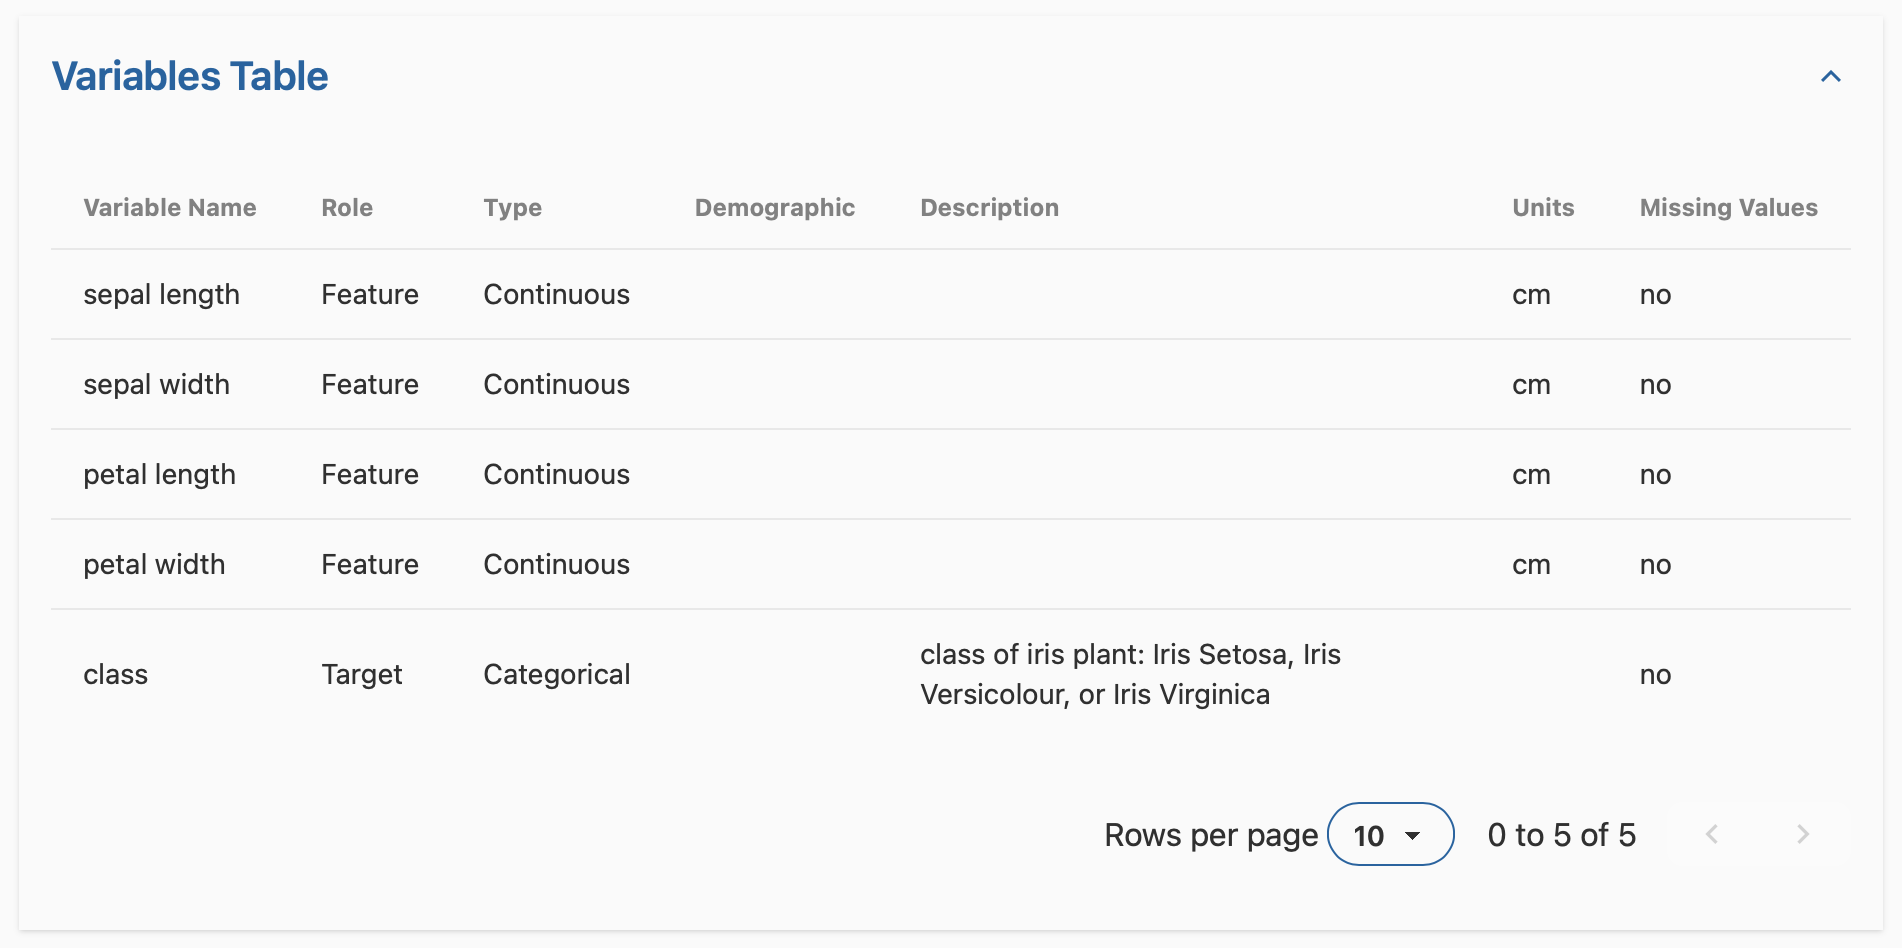

In [5]:
dataframe.columns = ["sepal length", "sepal width", "petal length", "petal width", "class"]

In [6]:
dataframe.head()

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


We can also determine how many classes we have by counting instances

In [7]:
dataframe["class"].value_counts()

class
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: count, dtype: int64

Instead of string names for class labels, we can use number labels which are more friendly for the model's training
step

In [8]:
# Maps each label with a number
labels_mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

dataframe = dataframe.replace(labels_mapping)

In [9]:
arr = dataframe.to_numpy()
features = []
labels = []

# Store features and labels in different arrays
for example in arr:
    features.append(example[0:4])
    labels.append(example[4])

Given that the dataset is now cleared we can store labels and features in the disk as NumPy objects for later use

In [11]:
import numpy as np

# Convert to NP Arrays
feats = np.array(features)
labels = np.array(labels, dtype="uint8")

# Save to disk
np.save("features.npy", feats)
np.save("labels.npy", labels)

With our features separated from 

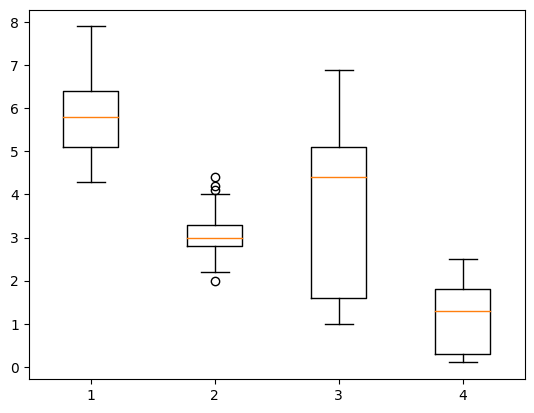

In [13]:
import matplotlib.pyplot as plt

plt.boxplot(feats)
plt.show()